
# Lock-in Amplifier — Data Analysis 

Full data analysis for the Lock-in Amplifier experiment:
1. **Calibration** — Linear fits of \(V_{sig}\) vs \(V_{DC}\) for 5 frequencies and 2 gains (50, 100).
2. **Mutual Inductance** — Linear fits of \(V_{DC}\) vs \(V_{AC}\), slope vs frequency fit, and mutual inductance estimation.
3. **Low Resistance Measurement** — Linear fits of \(V_{DC}\) vs \(V_{AC}\) for 5 frequencies and 2 gains, and average slope estimation.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from pathlib import Path

# linear fit with covariance
def linear_fit(x, y):
    p, cov = np.polyfit(x, y, 1, cov=True)
    m, b = p
    dm, db = np.sqrt(np.diag(cov))
    return m, b, dm, db, cov

output_dir = Path(r'Lock-In Amplifier')
output_dir.mkdir(parents=True, exist_ok=True)

In [177]:
def actosig(x):
    return (13.2/4713.2)*x/(2*np.sqrt(2))

In [178]:
def rms(x):
    return x/(2*np.sqrt(2))

In [ ]:
# Frequencies and gains (as requested)
frequencies = [300, 610, 905, 1205, 1510]
gains = [50, 100]  # Gain 50 and Gain 100

#For gain 50
Vsig_300_gain50  = actosig(np.array([1.070,1.505,2.005,2.50,3.00])) 
Vdc_300_gain50   = np.array([0.112,0.186,0.274,0.325,0.407 ])

Vsig_600_gain50  = actosig(np.array([3.05,2.50,2.05,1.515,1.000]))
Vdc_600_gain50   = np.array([0.413,0.321,0.250,0.192,0.104])

Vsig_900_gain50  = actosig(np.array([1.0,1.505,2.0,2.5,3.05]))
Vdc_900_gain50   = np.array([0.103,0.187,0.273,0.320,0.409])

Vsig_1200_gain50 = actosig(np.array([1.03,1.5,2.015,2.55,3.05 ]))
Vdc_1200_gain50  = np.array([0.107,0.186,0.275,0.326,0.406])

Vsig_1500_gain50 = actosig(np.array([1.03,1.5,2.015,2.5,3.05]))
Vdc_1500_gain50  = np.array([0.108,0.186,0.276,0.319,0.416])

# For gain 100 
Vsig_300_gain100  = actosig(np.array([1.015,1.505,2.000,2.5,3.00]))
Vdc_300_gain100   = np.array([0.258,0.419,0.589,0.679,0.830])

Vsig_600_gain100  = actosig(np.array([1.03,1.505,2.01,2.55,3.00]))
Vdc_600_gain100   = np.array([0.260,0.418,0.591,0.692,0.830])

Vsig_900_gain100  = actosig(np.array([3.00,2.50,2.00,1.505,1.005]))
Vdc_900_gain100   = np.array([0.829,0.668,0.531,0.415,0.252])

Vsig_1200_gain100 = actosig(np.array([1.005,1.505,2.000,2.5,3.0]))
Vdc_1200_gain100  = np.array([0.252,0.414,0.583,0.675,0.830])

Vsig_1500_gain100 = actosig(np.array([3.00,2.50,2.05,1.5,1.0]))
Vdc_1500_gain100  = np.array([0.831,0.674,0.536,0.412,0.250])

# ---------------- Mutual inductance data placeholders ----------------

Vac_600  = rms(np.array([7.00,9.05,11.00,13.00,15.00]))
Vdc_mi_600 = np.array([0.04,0.068,0.094,0.122,0.154])

Vac_900  = rms(np.array([7.05,9.05,11.00,13.05,15.00]))
Vdc_mi_900 = np.array([0.085,0.124,0.162,0.203,0.247])

Vac_1200 = rms(np.array([7.0,9.0,11.05,13.00,15.05]))
Vdc_mi_1200 = np.array([0.126,0.177,0.230,0.280,0.342])

Vac_1500 = rms(np.array([7.0,9.05,11.0,13.05,15.0,12.05]))
Vdc_mi_1500 = np.array([0.169,0.235,0.298,0.365,0.438,0.331])


calib_data_gain50 = {
    300.5: (Vsig_300_gain50, Vdc_300_gain50),
    610: (Vsig_600_gain50, Vdc_600_gain50),
    905: (Vsig_900_gain50, Vdc_900_gain50),
    1205:(Vsig_1200_gain50, Vdc_1200_gain50),
    1510:(Vsig_1500_gain50, Vdc_1500_gain50),
}

calib_data_gain100 = {
    305.5: (Vsig_300_gain100, Vdc_300_gain100),
    605: (Vsig_600_gain100, Vdc_600_gain100),
    900: (Vsig_900_gain100, Vdc_900_gain100),
    1200:(Vsig_1200_gain100, Vdc_1200_gain100),
    1500:(Vsig_1500_gain100, Vdc_1500_gain100),
}

mutual_data = {
    600: (Vac_600, Vdc_mi_600),
    905: (Vac_900, Vdc_mi_900),
    1205:(Vac_1200, Vdc_mi_1200),
    1500:(Vac_1500, Vdc_mi_1500),
}

# --- Low Resistance ---
Vac_300_lr50, Vdc_300_lr50 = rms(np.array([1.025,1.500,2.00,2.50,3.00])), np.array([0.074,0.137,0.207,0.242,0.309])
Vac_600_lr50, Vdc_600_lr50 = rms(np.array([1.025,1.505,2.005,2.50,3.05])), np.array([0.074,0.138,0.208,0.242,0.312])
Vac_900_lr50, Vdc_900_lr50 = rms(np.array([1.060,1.510,2.005,2.55,3.05])), np.array([0.078,0.138,0.207,0.247,0.311])
Vac_1200_lr50, Vdc_1200_lr50 = rms(np.array([1.075,1.500,2.01,2.50,3.05])), np.array([0.075,0.137,0.208,0.239,0.311])
Vac_1500_lr50, Vdc_1500_lr50 = rms(np.array([1.065,1.500,2.035,2.5,3.05])), np.array([0.078,0.137,0.212,0.239,0.314])

Vac_300_lr100, Vdc_300_lr100 = rms(np.array([1.060,1.510,2.005,2.55,3.05])), np.array([0.204,0.323,0.459,0.534,0.663])
Vac_600_lr100, Vdc_600_lr100 = rms(np.array([1.09,1.5,2.02,2.5,3.0])), np.array([0.211,0.319,0.461,0.523,0.646])
Vac_900_lr100, Vdc_900_lr100 = rms(np.array([1.005,1.505,2.005,2.5,3.0])), np.array([0.190,0.320,0.457,0.522,0.656])
Vac_1200_lr100, Vdc_1200_lr100 = rms(np.array([1.04,1.510,2.005,2.55,3.00])), np.array([0.198,0.320,0.456,0.527,0.645])
Vac_1500_lr100, Vdc_1500_lr100 = rms(np.array([1.005,1.500,2.01,2.55,3.00])), np.array([0.189,0.319,0.457,0.525,0.644])

lowR_data_gain50 = {300:(Vac_300_lr50,Vdc_300_lr50),605:(Vac_600_lr50,Vdc_600_lr50),
                    905:(Vac_900_lr50,Vdc_900_lr50),1205:(Vac_1200_lr50,Vdc_1200_lr50),
                    1505:(Vac_1500_lr50,Vdc_1500_lr50)}
lowR_data_gain100 = {305:(Vac_300_lr100,Vdc_300_lr100),600:(Vac_600_lr100,Vdc_600_lr100),
                     900:(Vac_900_lr100,Vdc_900_lr100),1205:(Vac_1200_lr100,Vdc_1200_lr100),
                     1500:(Vac_1500_lr100,Vdc_1500_lr100)}
Vsig_300_gain50, Vdc_300_gain50

(array([0.00105949, 0.00149022, 0.00198531, 0.00247544, 0.00297053]),
 array([0.112, 0.186, 0.274, 0.325, 0.407]))

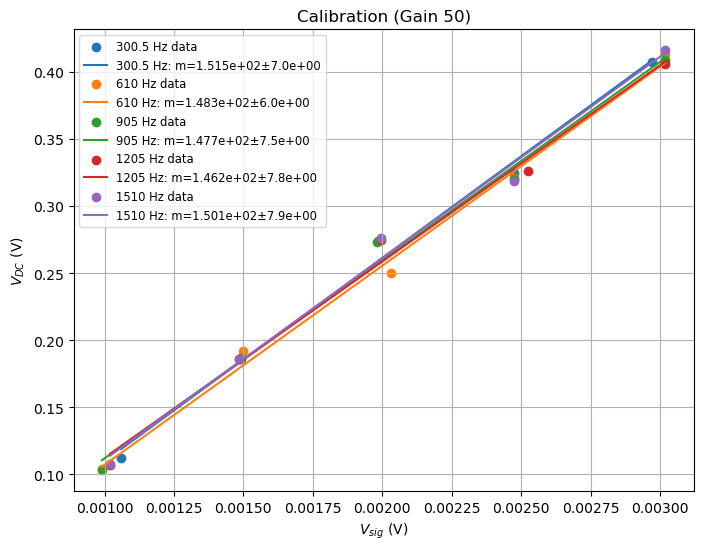

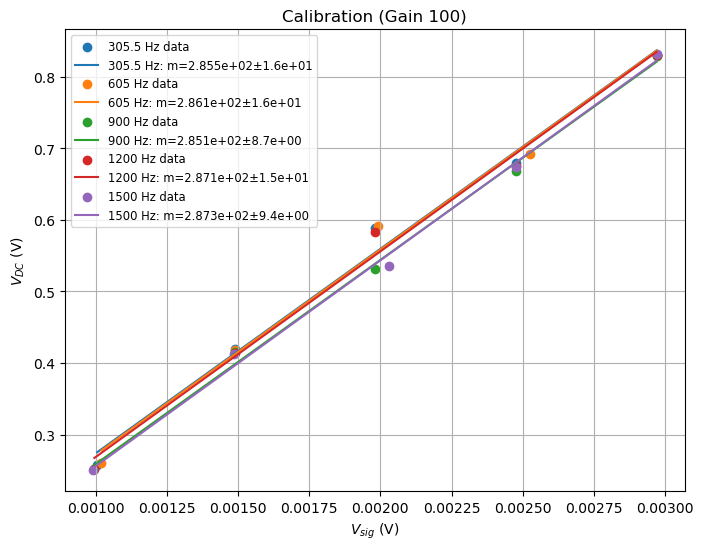

In [180]:

def analyze_calibration(calib_dict, gain_label):
    results = {}
    fig, ax = plt.subplots(figsize=(8,6))
    for f,(xarr,yarr) in calib_dict.items():
        if xarr.size<2 or yarr.size<2: continue
        m,b,dm,db,_ = linear_fit(xarr,yarr)
        results[f] = (m,dm)
        xs = np.linspace(np.min(xarr),np.max(xarr),200)
        ax.scatter(xarr,yarr,label=f'{f} Hz data')
        ax.plot(xs,m*xs+b,label=f'{f} Hz: m={m:.3e}±{dm:.1e}')
    ax.set_xlabel(r'$V_{sig}$ (V)'); ax.set_ylabel(r'$V_{DC}$ (V)')
    ax.set_title(f'Calibration (Gain {gain_label})')
    ax.legend(fontsize='small'); ax.grid(True)
    fig.savefig(output_dir/f'calibration_gain{gain_label}.png',dpi=200)
    plt.show()
    return results

res50 = analyze_calibration(calib_data_gain50,50)
res100 = analyze_calibration(calib_data_gain100,100)


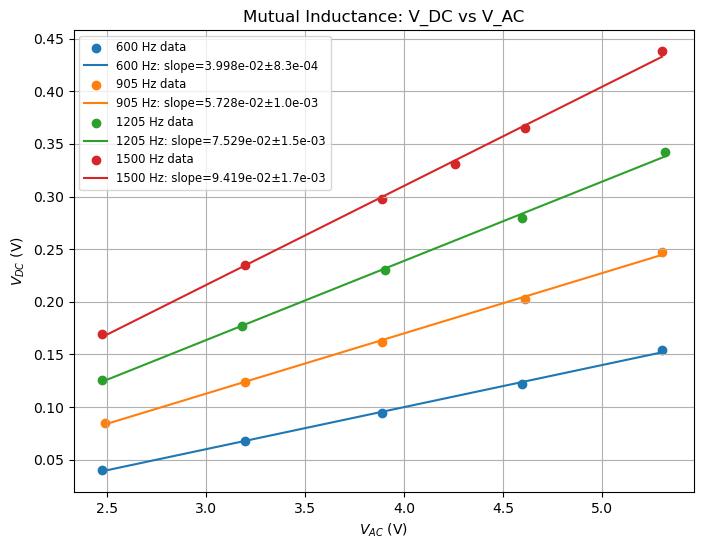

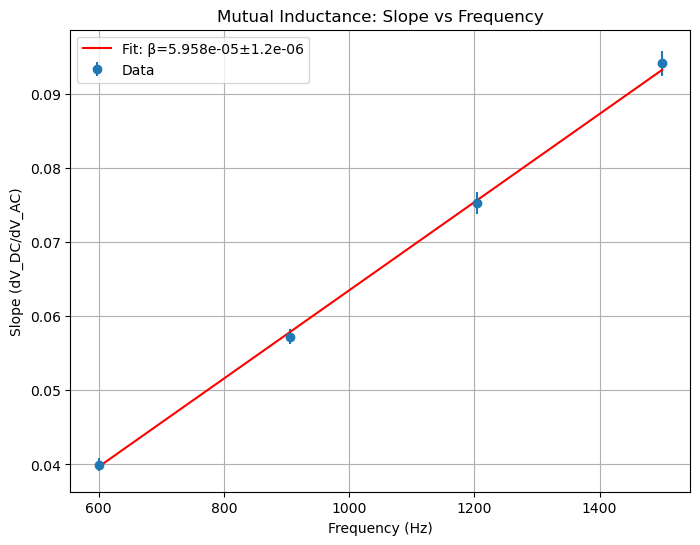

β = 5.958e-05 ± 1.2e-06
Mutual Inductance M = 4.551e-02 H (assuming µ=1.0)


In [184]:

def analyze_mutual(data):
    slopes, errs, freqs = [], [], []
    fig, ax = plt.subplots(figsize=(8,6))
    for f,(xarr,yarr) in data.items():
        if xarr.size<2 or yarr.size<2: continue
        m,b,dm,db,_ = linear_fit(xarr,yarr)
        slopes.append(m); errs.append(dm); freqs.append(f)
        xs = np.linspace(np.min(xarr),np.max(xarr),200)
        ax.scatter(xarr,yarr,label=f'{f} Hz data')
        ax.plot(xs,m*xs+b,label=f'{f} Hz: slope={m:.3e}±{dm:.1e}')
    ax.set_xlabel(r'$V_{AC}$ (V)'); ax.set_ylabel(r'$V_{DC}$ (V)')
    ax.set_title('Mutual Inductance: V_DC vs V_AC')
    ax.legend(fontsize='small'); ax.grid(True)
    fig.savefig(output_dir/'mutual_vdc_vac.png',dpi=200); plt.show()

    freqs, slopes, errs = np.array(freqs), np.array(slopes), np.array(errs)
    if len(freqs)>=2:
        w = 1/errs
        p,cov = np.polyfit(freqs,slopes,1,w=w,cov=True)
        beta, intercept = p; dbeta = np.sqrt(cov[0,0])
        # Display slope vs frequency plot
        plt.figure(figsize=(8,6))
        plt.errorbar(freqs, slopes, yerr=errs, fmt='o', label='Data')
        plt.plot(freqs, beta*freqs + intercept, 'r-', label=f'Fit: β={beta:.3e}±{dbeta:.1e}')
        plt.xlabel('Frequency (Hz)'); plt.ylabel('Slope (dV_DC/dV_AC)')
        plt.title('Mutual Inductance: Slope vs Frequency')
        plt.legend(); plt.grid(True)
        plt.savefig(output_dir/'mutual_slope_freq.png',dpi=200)
        plt.show()
        print(f"β = {beta:.3e} ± {dbeta:.1e}")
        R, mu = 4.8e3, 1.0
        M = beta*R/(2*pi*mu)
        print(f"Mutual Inductance M = {M:.3e} H (assuming µ={mu})")
    else:
        print("Not enough data for slope vs frequency fit.")

analyze_mutual(mutual_data)


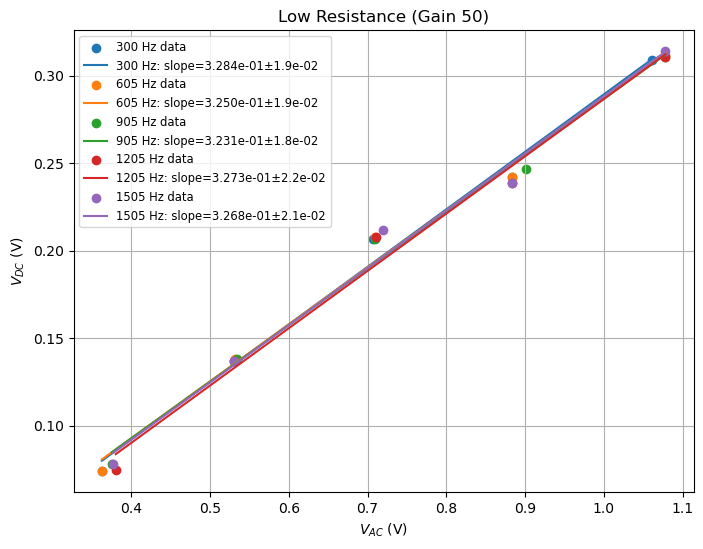

Gain 50: Average slope = 3.2612e-01 ± 2.0e-02


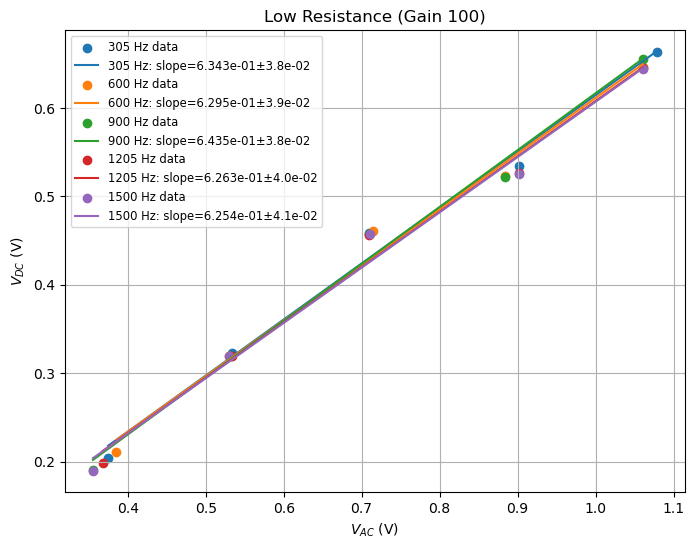

Gain 100: Average slope = 6.3181e-01 ± 3.9e-02


In [182]:

def analyze_lowR(data_dict, gain):
    slopes, errs, freqs = [], [], []
    fig, ax = plt.subplots(figsize=(8,6))
    for f,(xarr,yarr) in data_dict.items():
        if xarr.size<2 or yarr.size<2: continue
        m,b,dm,db,_ = linear_fit(xarr,yarr)
        slopes.append(m); errs.append(dm); freqs.append(f)
        xs = np.linspace(np.min(xarr),np.max(xarr),200)
        ax.scatter(xarr,yarr,label=f'{f} Hz data')
        ax.plot(xs,m*xs+b,label=f'{f} Hz: slope={m:.3e}±{dm:.1e}')
    ax.set_xlabel(r'$V_{AC}$ (V)'); ax.set_ylabel(r'$V_{DC}$ (V)')
    ax.set_title(f'Low Resistance (Gain {gain})')
    ax.legend(fontsize='small'); ax.grid(True)
    fig.savefig(output_dir/f'lowR_gain{gain}.png',dpi=200)
    plt.show()
    if slopes:
        avg = np.mean(slopes); avg_err = np.sqrt(np.mean(np.square(errs)))
        print(f"Gain {gain}: Average slope = {avg:.4e} ± {avg_err:.1e}")
    return

analyze_lowR(lowR_data_gain50,50)
analyze_lowR(lowR_data_gain100,100)


In [183]:
# ===============================================================
# SUMMARY OF ALL INPUT DATA AND FIT RESULTS (Displayed as Tables)
# ===============================================================

from prettytable import PrettyTable

def display_table(title, headers, data_rows):
    print(f"\n\033[1m{title}\033[0m")
    table = PrettyTable()
    table.field_names = headers
    for row in data_rows:
        table.add_row(row)
    print(table)

# ---- Calibration (Gain 50) ----
calib50_rows = []
for f, (xarr, yarr) in calib_data_gain50.items():
    if len(xarr) > 0:
        calib50_rows.append([f, ", ".join(map(str, np.round(xarr,4))),
                                ", ".join(map(str, np.round(yarr,4)))])
display_table("Calibration Data (Gain = 50)",
              ["Frequency (Hz)", "V_sig (V)", "V_DC (V)"], calib50_rows)

# ---- Calibration (Gain 100) ----
calib100_rows = []
for f, (xarr, yarr) in calib_data_gain100.items():
    if len(xarr) > 0:
        calib100_rows.append([f, ", ".join(map(str, np.round(xarr,4))),
                                ", ".join(map(str, np.round(yarr,4)))])
display_table("Calibration Data (Gain = 100)",
              ["Frequency (Hz)", "V_sig (V)", "V_DC (V)"], calib100_rows)


# ---- Mutual Inductance ----
mutual_rows = []
for f, (xarr, yarr) in mutual_data.items():
    if len(xarr) > 0:
        try:
            m,b,dm,db,_ = linear_fit(xarr, yarr)
            mutual_rows.append([f,
                ", ".join(map(str, np.round(xarr,4))),
                ", ".join(map(str, np.round(yarr,4))),
                f"{m:.4e} ± {dm:.1e}"
            ])
        except:
            mutual_rows.append([f, ", ".join(map(str, xarr)), ", ".join(map(str, yarr)), "fit error"])
display_table("Mutual Inductance Data",
              ["Frequency (Hz)", "V_AC (V)", "V_DC (V)", "Slope (dV_DC/dV_AC)"], mutual_rows)


# ---- Low Resistance (Gain 50) ----
lowR50_rows = []
for f, (xarr, yarr) in lowR_data_gain50.items():
    if len(xarr) > 0:
        try:
            m,b,dm,db,_ = linear_fit(xarr, yarr)
            lowR50_rows.append([f,
                ", ".join(map(str, np.round(xarr,4))),
                ", ".join(map(str, np.round(yarr,4))),
                f"{m:.4e} ± {dm:.1e}"
            ])
        except:
            lowR50_rows.append([f, ", ".join(map(str, xarr)), ", ".join(map(str, yarr)), "fit error"])
display_table("Low Resistance Data (Gain = 50)",
              ["Frequency (Hz)", "V_AC (V)", "V_DC (V)", "Slope (dV_DC/dV_AC)"], lowR50_rows)


# ---- Low Resistance (Gain 100) ----
lowR100_rows = []
for f, (xarr, yarr) in lowR_data_gain100.items():
    if len(xarr) > 0:
        try:
            m,b,dm,db,_ = linear_fit(xarr, yarr)
            lowR100_rows.append([f,
                ", ".join(map(str, np.round(xarr,4))),
                ", ".join(map(str, np.round(yarr,4))),
                f"{m:.4e} ± {dm:.1e}"
            ])
        except:
            lowR100_rows.append([f, ", ".join(map(str, xarr)), ", ".join(map(str, yarr)), "fit error"])
display_table("Low Resistance Data (Gain = 100)",
              ["Frequency (Hz)", "V_AC (V)", "V_DC (V)", "Slope (dV_DC/dV_AC)"], lowR100_rows)



Calibration Data (Gain = 50)
+----------------+--------------------------------------+-----------------------------------+
| Frequency (Hz) |              V_sig (V)               |              V_DC (V)             |
+----------------+--------------------------------------+-----------------------------------+
|     300.5      | 0.0011, 0.0015, 0.002, 0.0025, 0.003 | 0.112, 0.186, 0.274, 0.325, 0.407 |
|      610       | 0.003, 0.0025, 0.002, 0.0015, 0.001  |  0.413, 0.321, 0.25, 0.192, 0.104 |
|      905       | 0.001, 0.0015, 0.002, 0.0025, 0.003  |  0.103, 0.187, 0.273, 0.32, 0.409 |
|      1205      | 0.001, 0.0015, 0.002, 0.0025, 0.003  | 0.107, 0.186, 0.275, 0.326, 0.406 |
|      1510      | 0.001, 0.0015, 0.002, 0.0025, 0.003  | 0.108, 0.186, 0.276, 0.319, 0.416 |
+----------------+--------------------------------------+-----------------------------------+

Calibration Data (Gain = 100)
+----------------+-------------------------------------+-----------------------------------+
